In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import re
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
#Reading Data
df=pd.read_csv('train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
#Checking for outliers
df.describe(percentiles=[0.0,0.25,0.50,0.75,0.95])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
0%,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
95%,846.500000,1.000000,3.000000,56.000000,3.000000,2.000000,112.079150
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
#Checking for Null Value
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df=df.interpolate(method='linear',limit_direction='forward')

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
df['Embarked']=df['Embarked'].fillna(value='S')

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [15]:
#Dropping columns
df.drop('PassengerId',axis=1,inplace=True)
df.drop('Name',axis=1,inplace=True)
df.drop('Cabin',axis=1,inplace=True)
df.drop('Ticket',axis=1,inplace=True)

In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [17]:
df['Sex']=df['Sex'].map({'male':1,'female':0})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [18]:
df['Embarked']=df['Embarked'].map({'S':1,'C':0,'Q':2})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [20]:
y=df.pop('Survived')
X=df

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [22]:
colnames = list(X_train.columns)

In [23]:
scaler=StandardScaler()

In [24]:
varlist=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
X_train=scaler.fit_transform(X_train[varlist])

In [25]:
(y_train.sum()/len(y_train))*100

37.39967897271268

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca=PCA(svd_solver='randomized', random_state=42)

In [28]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [29]:
pca.components_

array([[-0.53759299, -0.28700112,  0.12037441,  0.20182816,  0.28323456,
         0.59437591, -0.37402538],
       [ 0.33457501, -0.25441817, -0.45433455,  0.54831636,  0.52472682,
        -0.0396262 ,  0.19837279],
       [-0.07063006, -0.51179495,  0.5591391 , -0.05203911,  0.09051172,
        -0.04814212,  0.63814002],
       [-0.04441307,  0.74245866,  0.38379806,  0.38432447,  0.23128937,
         0.16688954,  0.26538552],
       [-0.25254373,  0.10691661, -0.52563247, -0.15774838, -0.26033938,
         0.47097263,  0.57794865],
       [ 0.06424465,  0.15008197, -0.05672504, -0.69073441,  0.69909341,
         0.05997653,  0.02622   ],
       [ 0.72400725, -0.07594111,  0.19911155, -0.07875669, -0.16200189,
         0.62415131, -0.09159126]])

In [30]:
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.537593,0.334575,Pclass
1,-0.287001,-0.254418,Sex
2,0.120374,-0.454335,Age
3,0.201828,0.548316,SibSp
4,0.283235,0.524727,Parch


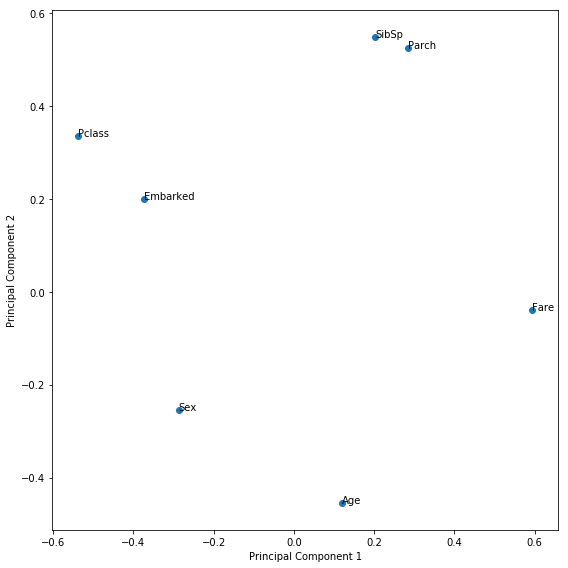

In [31]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

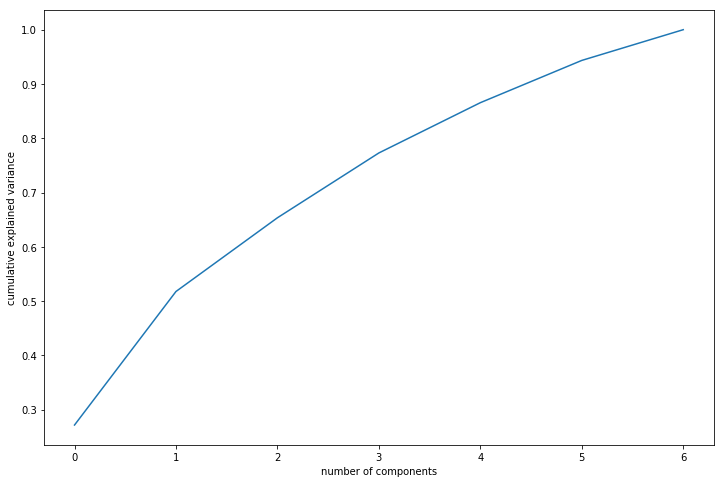

In [32]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [33]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=3)

In [34]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(623, 3)

In [35]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

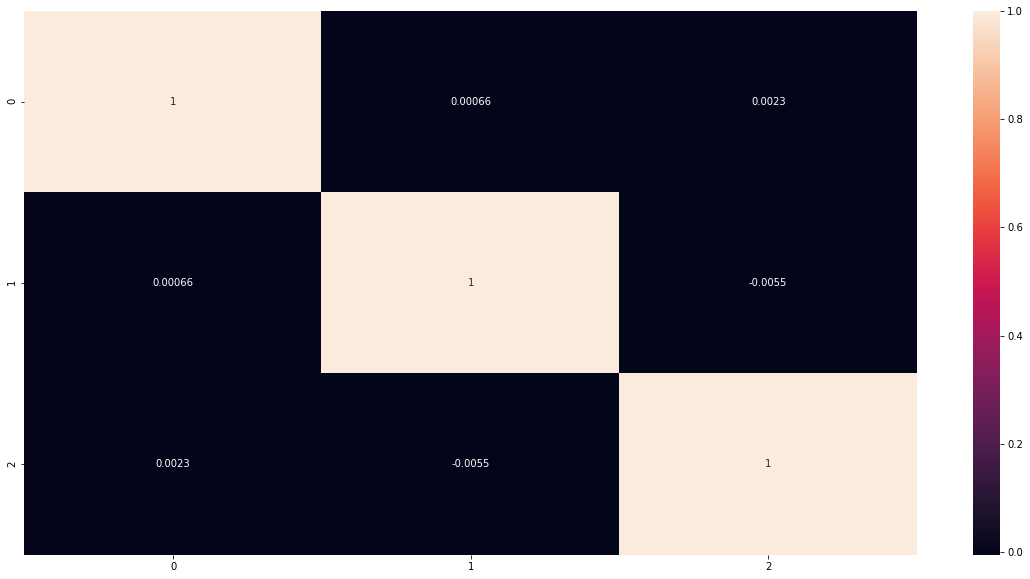

In [36]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [37]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [38]:
varlist=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
X_test=scaler.transform(X_test[varlist])

In [39]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(268, 3)

In [40]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.79'

In [59]:
test_data=pd.read_csv('test.csv')

In [60]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [61]:
test_data.shape

(418, 11)

In [62]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [63]:
test_data=test_data.interpolate(method='linear',limit_direction='forward')

In [64]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [65]:
test_data_copy=test_data.copy()

In [66]:
#Dropping columns
test_data.drop(['PassengerId','Name','Cabin','Ticket'],axis=1,inplace=True)

In [67]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [68]:
test_data['Sex']=test_data['Sex'].map({'male':1,'female':0})
test_data['Embarked']=test_data['Embarked'].map({'S':1,'C':0,'Q':2})
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,1
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,1
4,3,0,22.0,1,1,12.2875,1


In [69]:
varlist=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
test_data=scaler.transform(test_data[varlist])

In [70]:
#Applying selected components to the test data - 16 components
df_test_data = pca_final.transform(test_data)
df_test_data.shape

(418, 3)

In [71]:
pred_probs_test = model_pca.predict_proba(df_test_data)[:,1]

In [72]:
# Converting y_pred to a dataframe which is an array
pred_df = pd.DataFrame(pred_probs_test)
# Converting to column dataframe
pred_df.head()

,0
0,0.168443
1,0.593022
2,0.421100
3,0.136267
4,0.503937


In [73]:
pred_df= pred_df.rename(columns={ 0 : 'Churn_Prob'})

In [74]:
pred_df.head()

,Churn_Prob
0,0.168443
1,0.593022
2,0.421100
3,0.136267
4,0.503937


In [75]:
test_data_copy.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [76]:
pred_df['PassengerId']=test_data_copy['PassengerId']

In [77]:
pred_df= pred_df.rename(columns={ 'Churn_Prob' : 'Survival_Prob'})
pred_df.head()

,Survival_Prob,PassengerId
0,0.168443,892
1,0.593022,893
2,0.421100,894
3,0.136267,895
4,0.503937,896


In [78]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
pred_df['predicted'] = pred_df.Survival_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
pred_df.head()

,Survival_Prob,PassengerId,predicted
0,0.168443,892,0
1,0.593022,893,1
2,0.421100,894,0
3,0.136267,895,0
4,0.503937,896,1


In [ ]:
pred_df.to_csv('predicted_values.csv')